In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

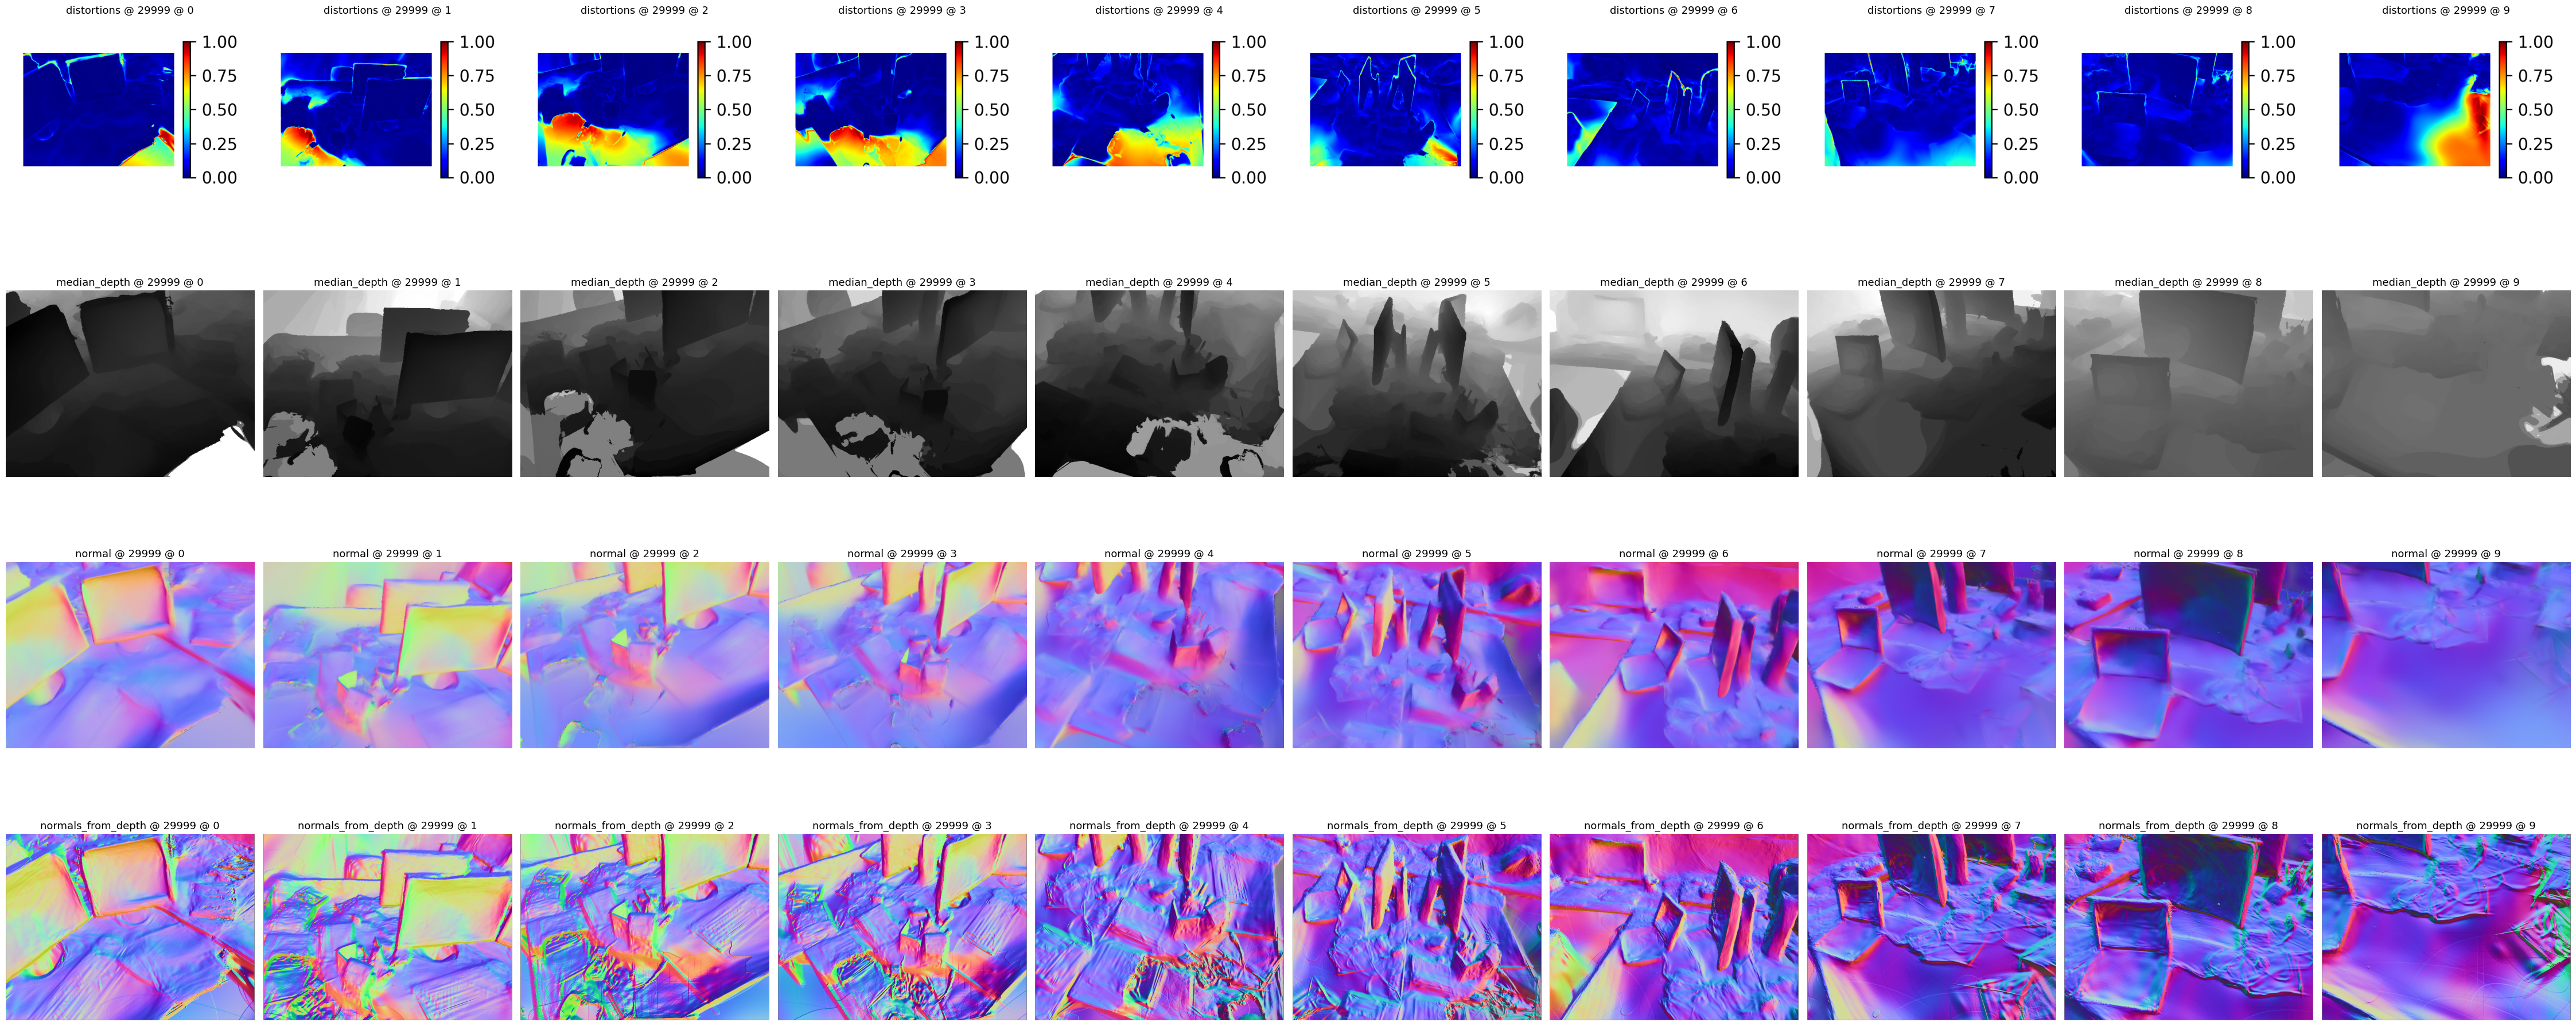

In [2]:
# Set your render output directory
render_dir = "results/tum_fr1_desk/renders"

# Define image types and steps to visualize
types = ["distortions", "median_depth", "normal", "normals_from_depth"]
step = 29999
num_val = 10

# Construct the image filenames
def get_image_path(image_type, idx, step=step):
    return os.path.join(render_dir, f"val_{idx:04d}_{image_type}_{step}.png")

# Plot the results
fig, axs = plt.subplots(len(types), num_val, figsize=(45, 20))

for i, image_type in enumerate(types):
    for j in range(num_val):
        path = get_image_path(image_type, j)
        if os.path.exists(path):
            img = Image.open(path)
            axs[i, j].imshow(img)
            axs[i, j].set_title(f"{image_type} @ {step} @ {j}", fontsize=13)
            axs[i, j].axis("off")
        else:
            axs[i, j].set_title(f"Missing: {image_type}_{step}")
            axs[i, j].axis("off")

plt.tight_layout()
plt.show()


In [18]:
import json

# Path to your JSON file
json_path = "results/tum_fr1_desk/stats/val_step29999.json"

# Load JSON data
with open(json_path, 'r') as f:
    metrics = json.load(f)

# Pretty print the results
print("\n📊 Evaluation Metrics:\n")
print(f"🔹 PSNR        : {metrics['psnr']:.2f} dB")
print(f"🔹 SSIM        : {metrics['ssim']:.3f}")
print(f"🔹 LPIPS       : {metrics['lpips']:.3f}")
print(f"⏱️  Ellipse Time: {metrics['ellipse_time']*1000:.2f} ms")
print(f"🔸 Num of Gaussians: {metrics['num_GS']:,}")


📊 Evaluation Metrics:

🔹 PSNR        : 21.04 dB
🔹 SSIM        : 0.756
🔹 LPIPS       : 0.289
⏱️  Ellipse Time: 3.88 ms
🔸 Num of Gaussians: 117,348
